**Analyse de survie appliquée à la réussite de projets Kickstarter**
_Jules EXBRAYAT & Abdenour MADANI_

# Import des outils / jeu de données

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
np.random.seed(0)
sns.set_theme()

In [3]:
df = pd.read_csv(
    "../data/kickst" "arter_1.csv",
    parse_dates=True,
)

# Présentation

## Problématique

In [4]:
# TODO: formuler une pbtique

## Jeu de données

In [16]:
# TODO: ajouter une description / une partie pour parler du jeu de données

### Lecture des données

### Présentation des variables

In [5]:
print(
    f"Il y a {df.shape[1]} variables qui décrivent {df.shape[0]} projets kickstarter."
)

Il y a 56 variables qui décrivent 4175 projets kickstarter.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4175 entries, 0 to 4174
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   day_succ                    4175 non-null   int64  
 1   Status                      4175 non-null   int64  
 2   cat1                        4175 non-null   int64  
 3   cat2                        4175 non-null   int64  
 4   cat3                        4175 non-null   int64  
 5   cat4                        4175 non-null   int64  
 6   cat5                        4175 non-null   int64  
 7   cat6                        4175 non-null   int64  
 8   cat7                        4175 non-null   int64  
 9   cat8                        4175 non-null   int64  
 10  cat9                        4175 non-null   int64  
 11  cat10                       4175 non-null   int64  
 12  cat11                       4175 non-null   int64  
 13  cat12                       4175 

Nous séparons les variables numériques des variables catégoriques pour plus de commodités.

In [35]:
var_categoriques = (
    [f"cat{i}" for i in range(1, 16)]
    + [f"curr{i}" for i in range(1, 7)]
    + ["Status", "facebook_connected", "has_video"]
)
var_categoriques

['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'curr1',
 'curr2',
 'curr3',
 'curr4',
 'curr5',
 'curr6',
 'Status',
 'facebook_connected',
 'has_video']

In [34]:
var_numeriques = df.columns

['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'curr1',
 'curr2',
 'curr3',
 'curr4',
 'curr5',
 'curr6',
 'Status',
 'facebook_connected',
 'has_video']

Nous convertissons les variables catégoriques en type `category`. (Nous les convertissons au préalable en type `string` car cela facilite l'affichage de la légende avec Matplotlib et Seaborn)

In [ ]:
df[var_categoriques] = df[var_categoriques].astype(str).astype("category")

Nous convertissons les variables au format date.

In [ ]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

In [ ]:
df.info()

Nous avons 11 variables catégoriques, 16 variables quantitatives (dont 15 entières) ainsi qu'une variable de type date.

# Analyse de survie

Analyse de survie sur des projets Kickstarter.

![Logo Kickstarter](../img/kickstarter-logo.svg)

## Ce qu'est Kickstarter

_Kickstarter_ est un site Internet qui permet le _crowd-funding_, autrement dit le financement participatif. Des créateurs proposent leur idée de projet, un objectif de financement à atteindre.

Si l'objectif de financement est atteint, les créateurs obtiennent le financement et peuvent réaliser le projet. Si l'objectif n'est pas atteint, les financeurs sont remboursés et le projet est annulé.

## Modélisation du problème

Soit **$T$** la variable aléatoire modélisant la **durée entre le lancement d'un projet et son succès**.  

### Fonction de survie
La **fonction de survie** correspond ici à la probabilité que le **succès** intervienne après un temps t.  
On cherche à modéliser la fonction de survie
$$
S : \begin{cases}
\mathbb{R}^+_* & \rightarrow [0, 1] \\
t & \rightarrow P(T > t)
\end{cases}
$$


### Vitesse de défaillance
La fonction de vitesse de défaillance (ici, de survie) du modèle est définie par 
$$
f : \begin{cases}
\mathbb{R}^+_* & \rightarrow \mathbb{R}^+ \\
t & \rightarrow - S'(t)
\end{cases}
$$

### Fonction de risque
À un moment donné $t$, $h(t)$ mesure le taux auquel les événements surviennent. Si $h(t)$ est élevé, cela signifie qu'il y a une forte probabilité que le succès se produise prochainement.
$$
h : \begin{cases}
\mathbb{R}^+_* & \rightarrow \mathbb{R}^+ \\
t & \rightarrow \dfrac{f(t)}{S(t)} 
\end{cases}
$$

### Fonction de risque cumulé
$$
H : \begin{cases}
\mathbb{R}^+_* & \rightarrow \mathbb{R}^+ \\
t & \rightarrow \displaystyle \int_{0}^{t} h(x)dx = -\ln(S(t)) 
\end{cases}
$$

### Problème de censure
La **censure** correspond au fait que certains projets n'ont pas atteint le succès dans le temps imparti pour leur récolte de fonds.  


# Jeu de données

Le jeu de données contient une liste de 18 143 projets Kickstarter menés entre le 15 décembre 2013 et le 15 juin 2014.

Pour chaque projet, nous disposons notamment de :
- sa date de départ
- sa date de fin prévue
- quand son objectif a été atteint
- si l'objectif a été atteint
- l'objectif financier
- le nombre de financeurs
- la catégorie du projet (art, cuisine, technologie, ...)
- informations sur le projet

# Kaplan-Meier

<Axes: xlabel='day_succ', ylabel='Count'>

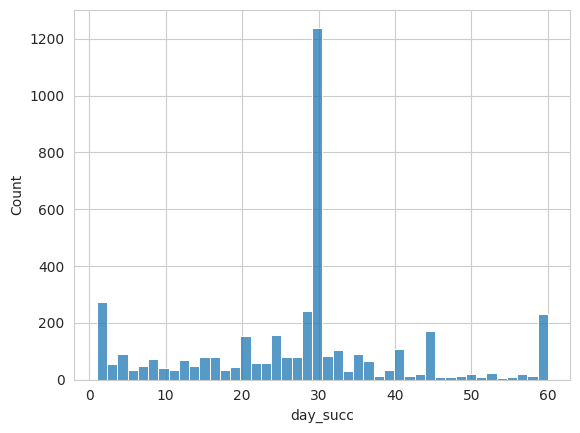

In [4]:
sns.histplot(df["day_succ"])